<a href="https://colab.research.google.com/github/YoshifumiMiyagi/KD_ML/blob/main/IP2_shizuoka_Unsupervised_1266.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
SEED=42
import numpy as np
import pandas as pd
import codecs

In [44]:
with codecs.open("/content/drive/MyDrive/R5_9_16DB1_Shizuoka_Unsupervised.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")

In [46]:
df.columns

Index(['施設', 'ID', 'Age (y)', 'Age (m)', 'Age', 'Age_0:4_1:7_2:8', 'Length',
       'Weight', 'sex', '5th Criteria count', '5th Criteria count_1',
       'BCG_non0_posi1', 'Onset date', 'Treat date',
       'TreatAre_0:before_1:2011_2:2016', 'Season', 'Treat day',
       'IVIG-non-responder_1', 'Second_line_nonresponders',
       'Non_responder_0_1_first_2_second', 'IVIG_first', '2nd_line', '3nd Tx',
       '4nd Tx', 'PSLnon0_use1', 'IFX_non0_use1', 'preWBC_1', 'postWBC_1',
       'FC_WBC', 'preNetro', 'post Netro', 'FC_Ne', 'pre_Lym', 'post_Lym',
       'N_L_ratio', 'preCRP_1', 'postCRP_1', 'FC_CRP', 'prePlt', 'postPlt',
       'FC_Plt', 'N_P_ratio', 'preTbil', 'postTbil', 'FC_Tbil', 'preAST',
       'postAST', 'FC_AST', 'preALT', 'postALT', 'FC_ALT', 'preNa@', 'postNa@',
       'FC_Na', 'preIgG', 'postIgG', 'FC_IgG'],
      dtype='object')

In [48]:
df = df.loc[:,['Age', 'Length', 'Weight', 'sex', '5th Criteria count_1', 'Season',
       'Treat day',
       'IVIG-non-responder_1', 'Second_line_nonresponders', 'PSLnon0_use1', 'IFX_non0_use1',
       'preWBC_1',  'preNetro',  'pre_Lym', 'preCRP_1',
       'prePlt','preTbil','preAST', 'preALT', 'preNa@', 'preIgG']]
df.columns = ['Age', 'Length', 'Weight', 'Sex', 'Criteria', 'Season',
       'Treat day',
       'IVIG-nonres', 'Second_line_nonres', 'PSL_use1', 'IFX_use1',
       'WBC',  'Neutrophil',  'lymphocyte', 'CRP',
       'Plt','Tbil','AST', 'ALT', 'Na', 'IgG']
df['Sex'] = df['Sex'].replace('male',0).replace('female',1)
df['Season'] = df['Season'].replace('Spring',0).replace('Summer',1).replace('Autum',2).replace('Winter',3)

In [55]:
df_ex_IFX_1st = df[(df['IFX_use1'] == 0)&(df['Second_line_nonres']==0)]
df_ex_IFX_1st.shape

(1153, 21)

In [85]:
df_IVIG_res = df_ex_IFX_1st[(df_ex_IFX_1st['IVIG-nonres'] == 0)&(df_ex_IFX_1st['PSL_use1']==0)]
df_IVIG_res['Group'] = 1
df_IVIG_nonres = df_ex_IFX_1st[(df_ex_IFX_1st['IVIG-nonres'] == 1)&(df_ex_IFX_1st['PSL_use1']==0)]
df_IVIG_nonres['Group'] = 2
df_IVIG_PSL_res = df_ex_IFX_1st[(df_ex_IFX_1st['IVIG-nonres'] == 0)&(df_ex_IFX_1st['PSL_use1']==1)]
df_IVIG_PSL_res['Group'] = 3
df_IVIG_PSL_nonres = df_ex_IFX_1st[(df_ex_IFX_1st['IVIG-nonres'] == 1)&(df_ex_IFX_1st['PSL_use1']==1)]
df_IVIG_PSL_nonres['Group'] = 4
df_IVIG_res.shape, df_IVIG_nonres.shape, df_IVIG_PSL_res.shape, df_IVIG_PSL_nonres.shape

<ipython-input-85-a50a79efd8f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IVIG_res['Group'] = 1
<ipython-input-85-a50a79efd8f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IVIG_nonres['Group'] = 2
<ipython-input-85-a50a79efd8f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

((908, 22), (92, 22), (89, 22), (64, 22))

In [86]:
Res = pd.concat([df_IVIG_res,df_IVIG_PSL_res])
Non = pd.concat([df_IVIG_nonres,df_IVIG_PSL_nonres])
Res.shape, Non.shape

((997, 22), (156, 22))

In [87]:
Dat = pd.concat([Res,Non])
Dat['NLR'] = Dat['Neutrophil']/Dat['lymphocyte']
Dat['PLR'] = Dat['Plt']/Dat['lymphocyte']
Dat.columns

Index(['Age', 'Length', 'Weight', 'Sex', 'Criteria', 'Season', 'Treat day',
       'IVIG-nonres', 'Second_line_nonres', 'PSL_use1', 'IFX_use1', 'WBC',
       'Neutrophil', 'lymphocyte', 'CRP', 'Plt', 'Tbil', 'AST', 'ALT', 'Na',
       'IgG', 'Group', 'NLR', 'PLR'],
      dtype='object')

In [88]:
X = Dat.drop('IVIG-nonres',axis=1).drop('Second_line_nonres',axis=1).drop('PSL_use1',axis=1).drop('IFX_use1',axis=1).drop('Group',axis=1)
y = Dat['Group']
X.shape, y.shape
# Dy_2 = raw3.loc[:,"Response"]
# # X.shape, y.shape

((1153, 19), (1153,))

Imputation and Standardization

In [89]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [90]:
imp_mean = IterativeImputer(random_state=SEED)

Dx_2 = X.copy()

A= imp_mean.fit_transform(Dx_2)
A= pd.DataFrame(A)
A.index = Dx_2.index
A.columns = Dx_2.columns

In [91]:
A_ss = StandardScaler().fit_transform(A)
A_ss = pd.DataFrame(A_ss)
A_ss.index = Dx_2.index
A_ss.columns = Dx_2.columns

# Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

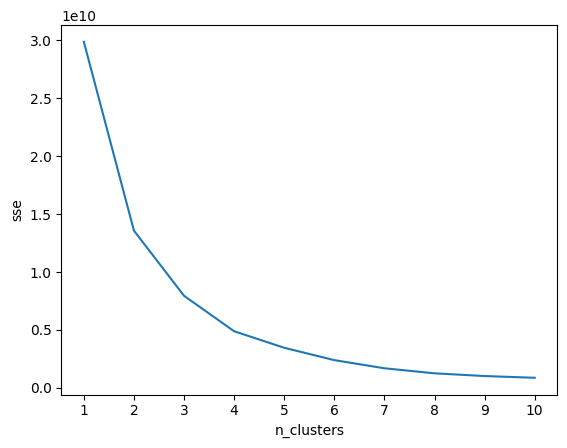

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=SEED)
  kmeans.fit(A)
  SSE.append(kmeans.inertia_)


plt.plot(range(1, 11), SSE)

plt.xlabel('n_clusters')
plt.ylabel('sse')
plt.xticks(range(1,11,1))

plt.show()

In [93]:
kmeans_model = KMeans(n_clusters = 3).fit(A)
clusters = kmeans_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [94]:
k=3
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

Cluster 0: n = 107
Cluster 1: n = 524
Cluster 2: n = 522


# UMAP

In [36]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.3 MB/s eta 0:00:00


In [37]:
import umap.umap_ as umap

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


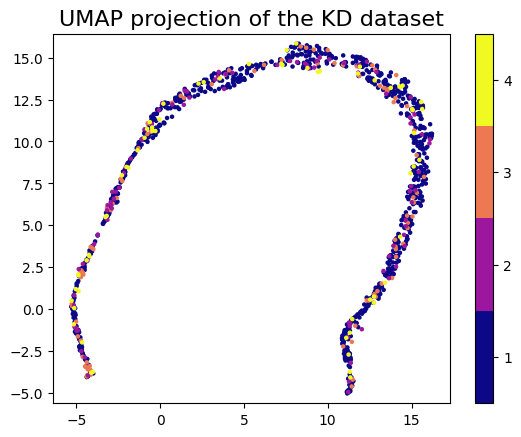

In [95]:
import matplotlib as mpl
#reducer = umap.UMAP(random_state=SEED, n_neighbors=4,min_dist=0.5,metric='chebyshev')
reducer = umap.UMAP(random_state=SEED, n_neighbors=50,min_dist=0.3,metric='chebyshev')
reducer.fit(A)
embedding = reducer.transform(A)

cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['1', '2','3']

plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='plasma',  s=5)
plt.gca().set_aspect('equal', 'datalim')

plt.title('UMAP projection of the KD dataset', fontsize=16)
#for i, label in enumerate(cluster_names):
#    plt.annotate(label, cluster_centers[i], size=8)

plt.colorbar(boundaries=np.arange(1,6,1)-0.5).set_ticks(np.arange(1,5,1))

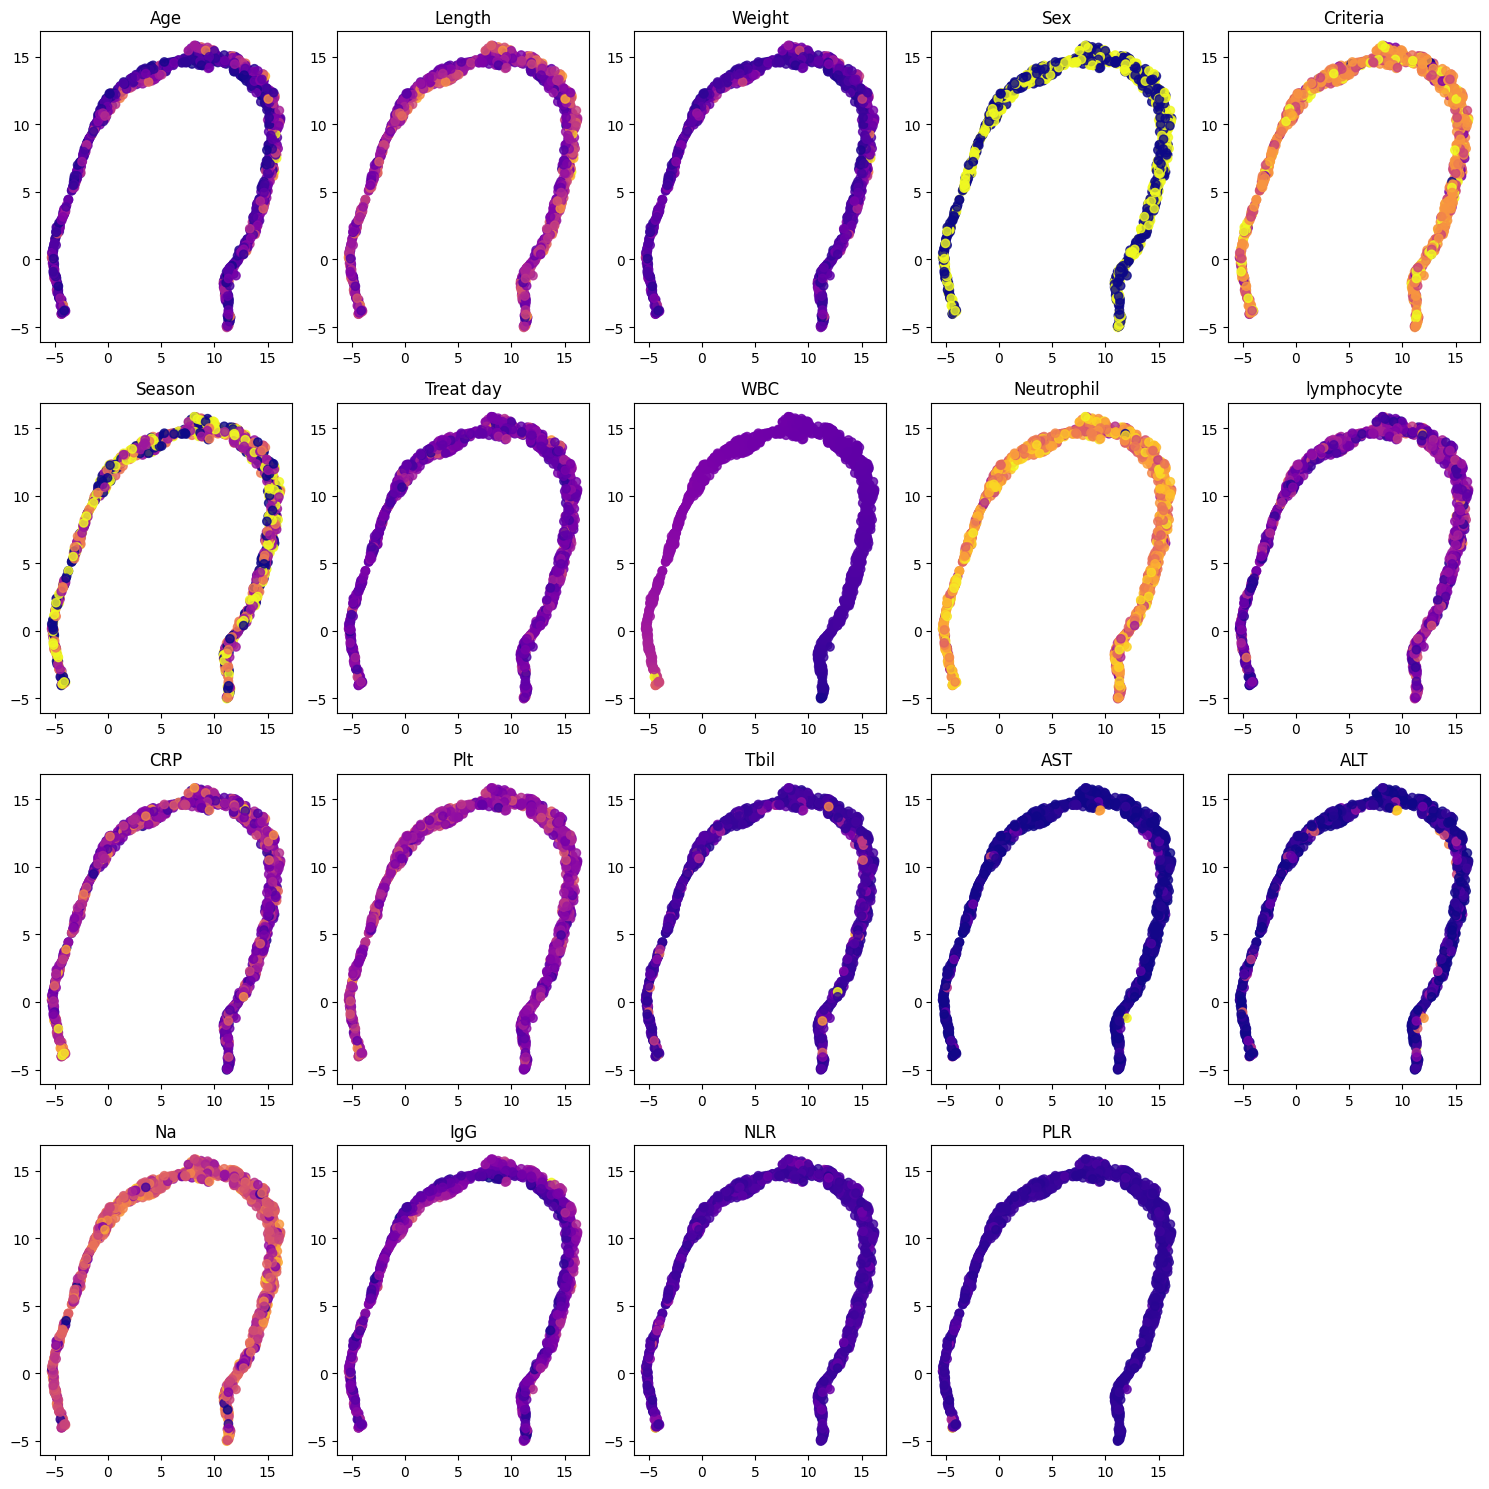

In [97]:
fig = plt.figure(figsize=(15,15))
cols = A.columns
for i, col in enumerate(cols):
    ax = fig.add_subplot(4, 5, i+1, title=col)
    ax.scatter(embedding[:, 0], embedding[:, 1],
        c=A[col], cmap='plasma', alpha=0.8)
fig.tight_layout()
plt.show()

# Quantification

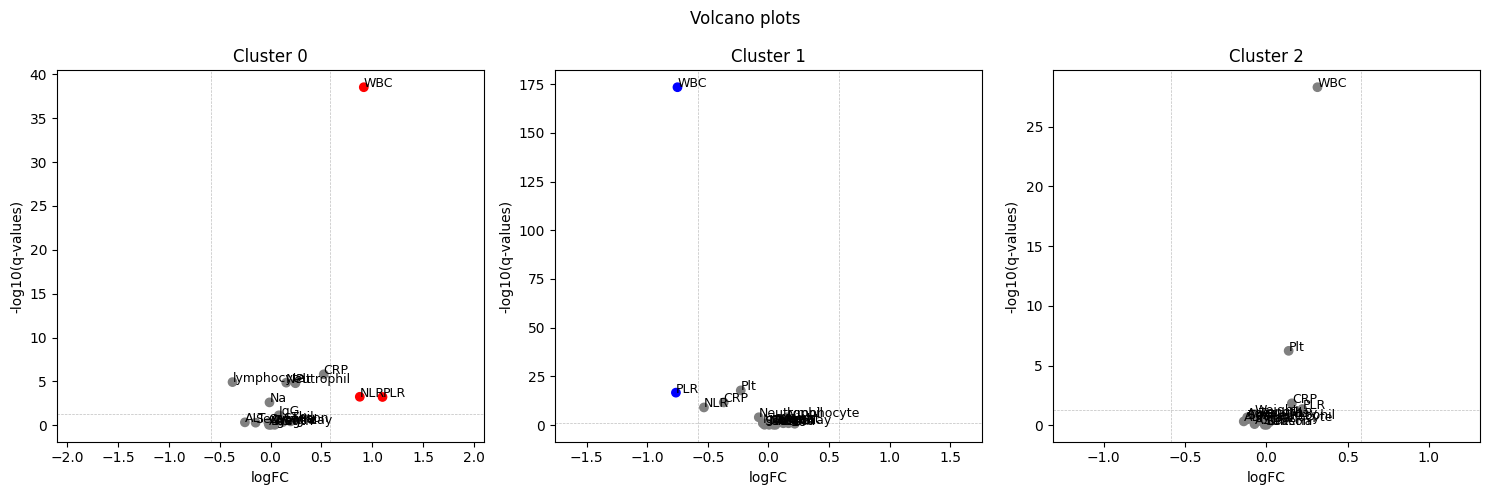

In [98]:
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

df_features_with_clusters = A.copy()
df_features_with_clusters['cluster'] = clusters
cols = A.columns

q_threshold = 0.05
fc_threshold = 1.5

fig = plt.figure(figsize=(15,5))

for i in range(k):
    p_values = []
    fcs = []

    for col in cols:

        group_1 = df_features_with_clusters[df_features_with_clusters['cluster'] == i][col]
        group_2 = df_features_with_clusters[df_features_with_clusters['cluster'] != i][col]
        p_value = stats.ttest_ind(group_1, group_2, equal_var=False)[1]
        p_values.append(p_value)


        fc = group_1.mean()/group_2.mean()
        fcs.append(fc)


    q_values = multipletests(p_values, method='fdr_bh')[1]


    colors = []
    for col, q_value, fc in zip(cols, q_values, fcs):

        if q_value < q_threshold and fc > fc_threshold:
            colors.append('red')

        elif q_value < q_threshold and fc < 1/fc_threshold:
            colors.append('blue')

        else:
            colors.append('gray')

    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(np.log2(fcs), -np.log10(q_values),
    c=colors)

    max_val = max(abs(np.nanmin(np.log2(fcs)[np.log2(fcs) != -np.inf])), max(np.log2(fcs)))
    ax.set_xlim([-max_val-1, max_val+1])
    ax.set_ylim(ax.get_ylim())


    ax.hlines([-np.log10(q_threshold)], -max_val-1, max_val+1, 'gray', 'dashed', linewidth=0.5, alpha=0.5)
    ax.vlines([np.log2(fc_threshold), np.log2(1/fc_threshold)], ax.get_ylim()[0], ax.get_ylim()[1], 'gray', 'dashed', linewidth=0.5, alpha=0.5)


    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('logFC')
    ax.set_ylabel('-log10(q-values)')
    for j, label in enumerate(cols):
        ax.annotate(label, (np.log2(fcs)[j], -np.log10(q_values)[j]), size=9)

fig.suptitle('Volcano plots')
fig.tight_layout()
plt.show()

# Other

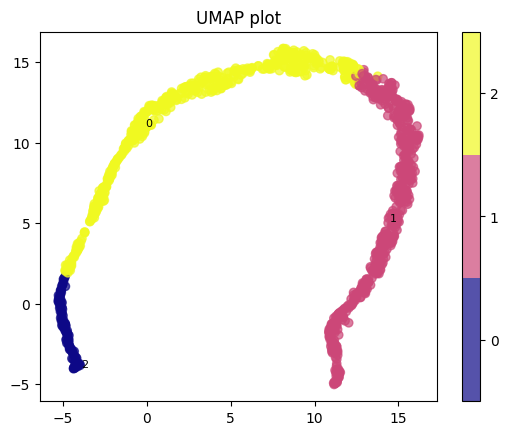

In [99]:
cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['0', '1','2']

plt.scatter(embedding[:, 0], embedding[:, 1],
    c=clusters, cmap='plasma', alpha=0.7)
plt.title('UMAP plot')
for i, label in enumerate(cluster_names):
    plt.annotate(label, cluster_centers[i], size=8)
plt.colorbar(boundaries=np.arange(0,4,1)-0.5).set_ticks(np.arange(0,3,1))
plt.show()

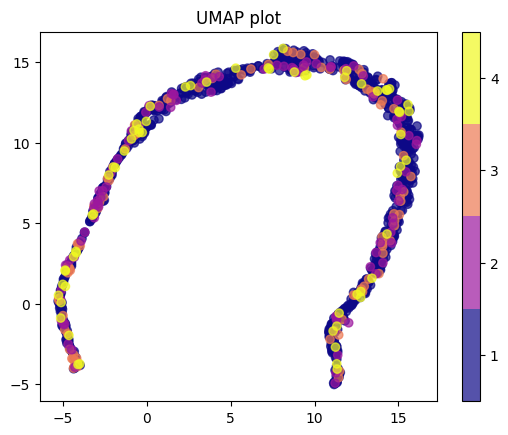

In [100]:
cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['1', '2','3','4']

plt.scatter(embedding[:, 0], embedding[:, 1],
    c=y, cmap='plasma', alpha=0.7)
plt.title('UMAP plot')



plt.colorbar(boundaries=np.arange(1,6,1)-0.5).set_ticks(np.arange(1,5,1))
plt.show()

In [101]:
B = df_features_with_clusters.copy()
B['Group'] = y

In [102]:
B[B['cluster']==0]["Group"].value_counts(),B[B['cluster']==1]["Group"].value_counts(),B[B['cluster']==2]["Group"].value_counts()

(Group
 1    75
 3    15
 2     9
 4     8
 Name: count, dtype: int64,
 Group
 1    432
 3     36
 2     32
 4     24
 Name: count, dtype: int64,
 Group
 1    401
 2     51
 3     38
 4     32
 Name: count, dtype: int64)

In [103]:
import scipy.stats as st
df = pd.DataFrame([[75,432,401],
                   [9,32,51]])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

0.06310704671725244


In [104]:
df = pd.DataFrame([[15,36,38],
                   [8,24,32]])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

0.6107666316010755
